In [1]:
from drugs import Trainer
import pandas as pd

In [9]:
trainer = Trainer()

In [10]:
trainer.processing_pipe

Pipeline(steps=[('text_cleaner',
                 TextCleaner(columns=['description', 'administrative_status',
                                      'marketing_status', 'dosage_form',
                                      'marketing_authorization_status',
                                      'marketing_authorization_process',
                                      'pharmaceutical_companies'])),
                ('date_cleaner',
                 DateCleaner(columns=['marketing_declaration_date',
                                      'marketing_authorization_date'])),
                ('percentage_encoder', Percent...
                 DropColumnsCleaner(columns=['drug_id', 'description',
                                             'administrative_status',
                                             'marketing_status',
                                             'approved_for_hospital_use',
                                             'reimbursement_rate',
                               

In [11]:
df = pd.read_csv("../data/drugs_train.csv")

In [57]:
df.groupby("reimbursement_rate").price.mean()

reimbursement_rate
0%      112.220000
100%    179.026342
15%      13.904326
30%       8.406845
65%      24.049047
Name: price, dtype: float64

In [58]:
df.reimbursement_rate.value_counts()

65%     7175
30%      656
15%      393
100%     339
0%         1
Name: reimbursement_rate, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
df1, df_test = train_test_split(df, random_state=40, test_size=0.2)

In [13]:
trainer.train(df1)

model scored on train: 0.8499800063820713
model scored on val: 0.34487998954439136


In [26]:
pred1 = trainer.predict(df_test)

In [27]:
truth1 = df_test[["drug_id", "price"]]

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
mean_squared_error(pred1.price, truth1.price, squared=False)

62.12042536312071

In [30]:
pred1.head()

,drug_id,price
3955,3955_train,13.835270
5939,5939_train,18.072357
8552,8552_train,15.056615
7083,7083_train,9.449079
2465,2465_train,40.350082


In [31]:
truth1.head()

,drug_id,price
3955,3955_train,8.95
5939,5939_train,10.65
8552,8552_train,18.95
7083,7083_train,24.53
2465,2465_train,47.80


<AxesSubplot:>

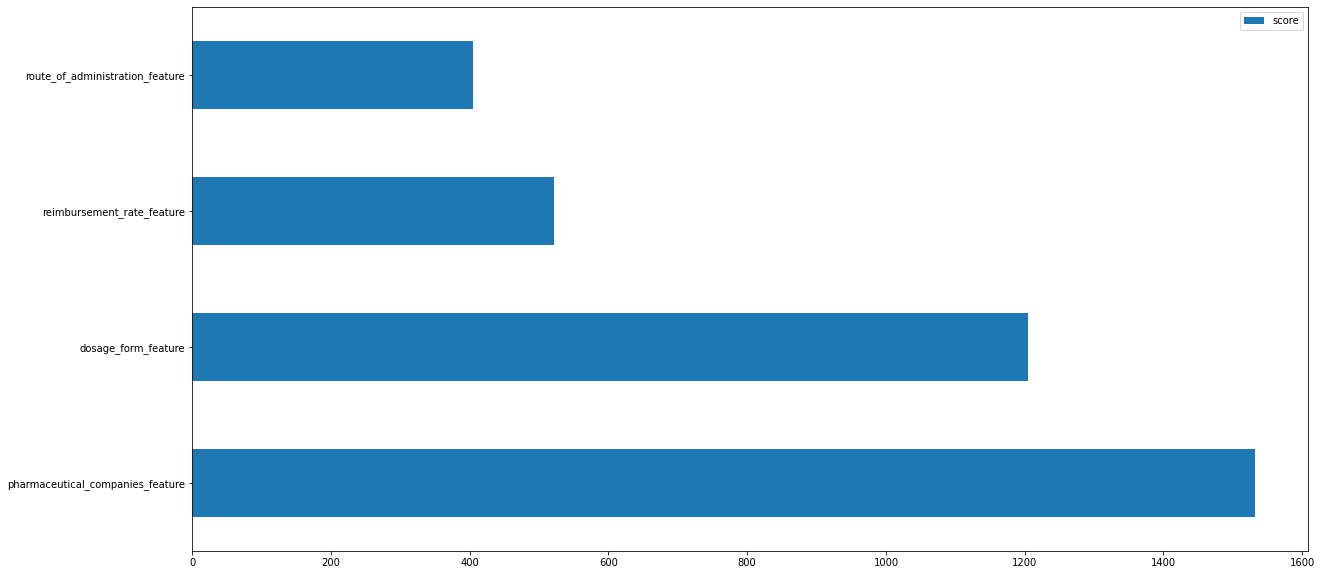

In [41]:
feature_important = trainer.model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [51]:
df1_transformed = trainer.processing_pipe.transform(df_test)

In [52]:
df1_transformed["price"] = df_test.price

In [53]:
df1_transformed

,reimbursement_rate_feature,dosage_form_feature,route_of_administration_feature,pharmaceutical_companies_feature,price
3955,0.65,13.109137,20.367947,14.880000,8.95
5939,0.65,28.881840,20.367947,16.184327,10.65
8552,0.65,15.896667,20.367947,11.990101,18.95
7083,0.65,9.906283,20.367947,11.990101,24.53
2465,0.65,18.272100,20.367947,25.944091,47.80
...,...,...,...,...,...
6657,0.65,8.566154,20.367947,25.020741,2.85
6306,0.65,31.158289,20.367947,11.990101,16.03
7252,0.65,18.272100,20.367947,12.873593,4.69
5246,0.65,23.204590,20.367947,16.184327,4.49


In [54]:
df1_transformed.corr()

,reimbursement_rate_feature,dosage_form_feature,route_of_administration_feature,pharmaceutical_companies_feature,price
reimbursement_rate_feature,1.000000,0.157768,0.186765,0.163499,0.251746
dosage_form_feature,0.157768,1.000000,0.546932,0.289847,0.392613
route_of_administration_feature,0.186765,0.546932,1.000000,0.373699,0.527571
pharmaceutical_companies_feature,0.163499,0.289847,0.373699,1.000000,0.488302
price,0.251746,0.392613,0.527571,0.488302,1.000000


In [56]:
df1_transformed.reimbursement_rate_feature.value_counts()

0.65    1438
0.30     135
0.15      71
1.00      69
Name: reimbursement_rate_feature, dtype: int64